In [1]:
import pandas as pd
import numpy as np
import matplotlib as mth

# Importação

In [2]:
dollar=pd.read_excel("./datas/dolarBRL2011.2021.xlsx")
barril=pd.read_excel("./datas/petroleo.2011.2021.xlsx")
gasolina=pd.read_excel("./datas/mensal-brasil-desde-jan2013.xlsx")

# Tratamento dos dados

## Gasolina
- Inserção dos dados de 2011 e 2012 à base

In [3]:
gas2=pd.read_csv("./datas/ca-2011-01.csv")
gas3=pd.read_csv("./datas/ca-2011-02.csv")
gas4=pd.read_csv("./datas/ca-2012-01.csv")
gas5=pd.read_csv("./datas/ca-2012-02.csv")


In [4]:
gasgas=pd.concat([gas2,gas3,gas4,gas5])

In [5]:
gasgas.set_index('Data da Coleta',inplace=True,drop=False)
gasgas.rename_axis('Período',inplace=True)

In [6]:
def_gasAntes=gasgas[gasgas['Produto']=='GASOLINA']

In [ ]:
def_gasAntes.drop(['Municipio','Revenda','CNPJ da Revenda','Nome da Rua','Complemento','Bairro','Cep'],axis=1,inplace=True)
def_gasAntes.drop(['Valor de Compra','Bandeira'],axis=1,inplace=True)

In [ ]:
def_gasAntes['media_mes']=0.0
def_gasAntes['dias_ok']=pd.to_datetime(def_gasAntes['Data da Coleta'],format="%d/%m/%Y")
def_gasAntes.sort_values('dias_ok',inplace=True)

In [20]:
i=0
while i<=def_gasAntes['media_mes'].__len__():
    continua=True
    soma=0.0
    cont=0
    print(def_gasAntes.iloc[i,4][3:])
    while continua and i<=def_gasAntes['media_mes'].__len__():
        if def_gasAntes.iloc[i,4][3:]==def_gasAntes.iloc[i+1,4][3:]:
            soma+=def_gasAntes.iloc[i,5]
            cont+=1
        elif (def_gasAntes.iloc[i,4][3:]!=def_gasAntes.iloc[i+1,4][3:]) or (i==def_gasAntes['media_mes'].__len__()):
            soma+=def_gasAntes.iloc[i,5]
            cont+=1
            def_gasAntes['media_mes'][i]=soma/cont
            continua=False
            print('terminou um mes')
            print(def_gasAntes.iloc[i,4][3:])
        i+=1
    #i+=1


01/2011


C:\Users\ednae\AppData\Local\Temp/ipykernel_12828/1456385608.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_gasAntes['media_mes'][i]=soma/cont


terminou um mes
01/2011
02/2011
terminou um mes
02/2011
03/2011
terminou um mes
03/2011
04/2011
terminou um mes
04/2011
05/2011
terminou um mes
05/2011
06/2011
terminou um mes
06/2011
07/2011
terminou um mes
07/2011
08/2011
terminou um mes
08/2011
09/2011
terminou um mes
09/2011
10/2011
terminou um mes
10/2011
11/2011
terminou um mes
11/2011
12/2011
terminou um mes
12/2011
01/2012
terminou um mes
01/2012
02/2012
terminou um mes
02/2012
03/2012
terminou um mes
03/2012
04/2012
terminou um mes
04/2012
05/2012
terminou um mes
05/2012
06/2012
terminou um mes
06/2012
07/2012
terminou um mes
07/2012
08/2012
terminou um mes
08/2012
09/2012
terminou um mes
09/2012
10/2012
terminou um mes
10/2012
11/2012
terminou um mes
11/2012
12/2012


IndexError: single positional indexer is out-of-bounds

In [19]:
def_gasAntes[def_gasAntes['media_mes']!=0]

,Regiao - Sigla,Estado - Sigla,Numero Rua,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,media_mes,dias_ok
Período,,,,,,,,,
31/01/2011,CO,MS,S/N,GASOLINA,31/01/2011,2.890,R$ / litro,2.645239,2011-01-31
24/02/2011,S,RS,452,GASOLINA,24/02/2011,2.829,R$ / litro,2.651252,2011-02-24
31/03/2011,NE,PE,101,GASOLINA,31/03/2011,2.900,R$ / litro,2.692812,2011-03-31
28/04/2011,SE,RJ,2009,GASOLINA,28/04/2011,3.044,R$ / litro,2.842003,2011-04-28
31/05/2011,SE,SP,14611,GASOLINA,31/05/2011,2.590,R$ / litro,2.866933,2011-05-31
30/06/2011,N,AM,1887,GASOLINA,30/06/2011,3.030,R$ / litro,2.773994,2011-06-30
28/07/2011,SE,MG,1701,GASOLINA,28/07/2011,2.879,R$ / litro,2.767156,2011-07-28
31/08/2011,SE,RJ,754,GASOLINA,31/08/2011,2.699,R$ / litro,2.766778,2011-08-31
29/09/2011,S,SC,108,GASOLINA,29/09/2011,2.747,R$ / litro,2.773253,2011-09-29


- Tratamento da base 2013~2021

In [ ]:
#REMOÇÃO DAS COLUNAS INDESEJADAS
gasolina.drop('NÚMERO DE POSTOS PESQUISADOS',axis=1,inplace=True)
#especifico a coluna que desejo, axis=1 é para coluna. inplace muda a bse original
gasolina.drop('DESVIO PADRÃO REVENDA',axis=1,inplace=True)
gasolina.drop('PREÇO MÍNIMO REVENDA',axis=1,inplace=True)
gasolina.drop('PREÇO MÁXIMO REVENDA',axis=1,inplace=True)
gasolina.drop(['DESVIO PADRÃO DISTRIBUIÇÃO','PREÇO MÍNIMO DISTRIBUIÇÃO','PREÇO MÁXIMO DISTRIBUIÇÃO'],axis=1,inplace=True)

df_gasolina=gasolina[gasolina.iloc[0:,1]=='GASOLINA COMUM']
df_gasolina.set_index(df_gasolina['MÊS'],inplace=True)
df_gasolina.rename_axis(index={'MÊS':'Período'},inplace=True)
df_gasolina.drop('MÊS',axis=1,inplace=True)

# Enriquecimento de dados
- Adição de informações
- Plotagens iniciais
- Compreensão univariada

## Dollar

In [23]:
#Criação de um valor médio para variação do dollar
dollar['V.Médio']=(dollar['Máxima']+dollar['Mínima'])/2
dollar.set_index('Data',inplace=True)
dollar.rename_axis('Período',inplace=True)

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

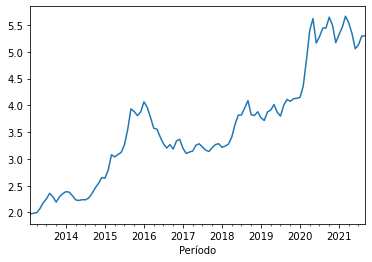

In [24]:
dollar.loc['2013-01-1':,'V.Médio'].plot()

In [25]:
#Normalizando pelo valor máximo
dollar['VU$.Norm']=dollar['V.Médio']/dollar['V.Médio'].max()

In [51]:
dollar['pct_change']=dollar['V.Médio'].pct_change()*100

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

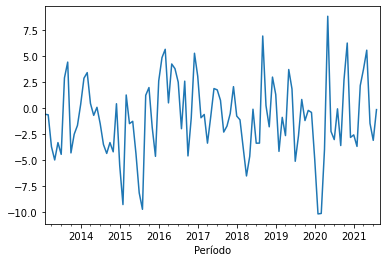

In [58]:
dollar.loc['2013-01-1':,'pct_change'].plot()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

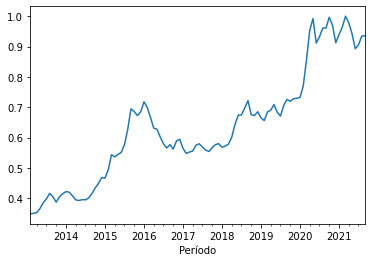

In [61]:
dollar.loc['2013-01-1':,'VU$.Norm'].plot()

## Barril

In [83]:
barril['V.Médio']=(barril['Máxima']+barril['Mínima'])/2
barril.set_index('Data',inplace=True,drop=False)
barril.rename_axis('Período',inplace=True)

In [84]:
barril['pct_change']=barril['V.Médio'].pct_change()*100

In [85]:
barril.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,V.Médio,pct_change
Período,,,,,,,,,
2021-09-01,2021-09-01,78.25,71.68,79.94,70.42,"97,97K",0.0721,75.180,NaN
2021-08-01,2021-08-01,72.99,75.39,75.39,64.60,"5,51M",-0.0438,69.995,-6.896781
2021-07-01,2021-07-01,76.33,74.69,77.84,67.44,"5,85M",0.0160,72.640,3.778841
2021-06-01,2021-06-01,75.13,69.39,76.60,69.29,"5,06M",0.0838,72.945,0.419879
2021-05-01,2021-05-01,69.32,66.70,70.24,64.57,"5,09M",0.0308,67.405,-7.594763


<AxesSubplot:xlabel='Período'>

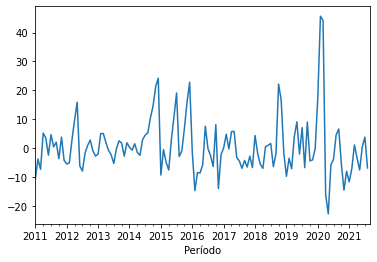

In [56]:
barril['pct_change'].plot()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

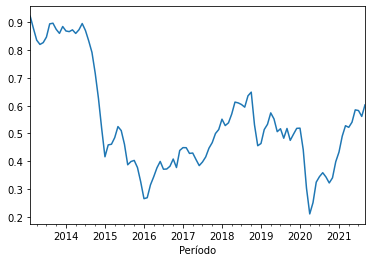

In [57]:
barril['VBar.Norm']=barril['V.Médio']/barril['V.Médio'].max()
barril.loc['2013-01-1':,'VBar.Norm'].plot()

## Gasolina

In [32]:
df_gasolina['PMVGas.Norm']=df_gasolina['PREÇO MÉDIO REVENDA']/df_gasolina['PREÇO MÉDIO REVENDA'].max()

C:\Users\ednae\AppData\Local\Temp/ipykernel_1324/1712394270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gasolina['PMVGas.Norm']=df_gasolina['PREÇO MÉDIO REVENDA']/df_gasolina['PREÇO MÉDIO REVENDA'].max()


In [46]:
df_gasolina['pct_change']=df_gasolina['PREÇO MÉDIO REVENDA'].pct_change()*100

C:\Users\ednae\AppData\Local\Temp/ipykernel_1324/823332931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gasolina['pct_change']=df_gasolina['PREÇO MÉDIO REVENDA'].pct_change()*100


<AxesSubplot:xlabel='Período'>

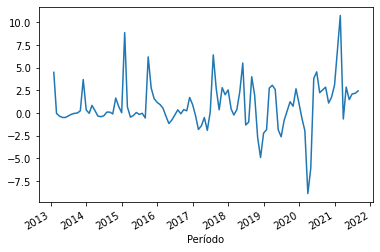

In [55]:
df_gasolina['pct_change'].plot()

<AxesSubplot:xlabel='Período'>

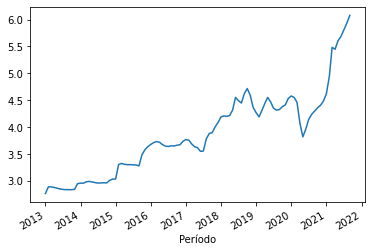

In [54]:
df_gasolina['PREÇO MÉDIO REVENDA'].plot()

# Avaliações combinadas

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]
C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


<AxesSubplot:xlabel='Período'>

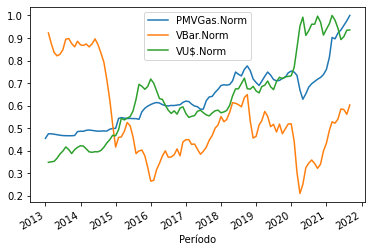

In [34]:
df_gasolina['PMVGas.Norm'].plot(legend=True)
barril.loc['2013-01-1':,'VBar.Norm'].plot(legend=True)
dollar.loc['2013-01-1':,'VU$.Norm'].plot(legend=True)

In [35]:
frames = pd.concat([df_gasolina['PMVGas.Norm'],barril.loc['2013-01-1':,'VBar.Norm'],dollar.loc['2013-01-1':,'VU$.Norm']],axis=1)
frames.corr()

C:\Users\ednae\anaconda3\envs\rsd\lib\site-packages\pandas\core\indexing.py:862: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  return getattr(section, self.name)[new_key]


,PMVGas.Norm,VBar.Norm,VU$.Norm
PMVGas.Norm,1.000000,-0.388830,0.832829
VBar.Norm,-0.388830,1.000000,-0.639191
VU$.Norm,0.832829,-0.639191,1.000000


In [36]:
frames.loc['2015-01-01':'2019-01-01'].corr()
#analisando apenas o período em questão

,PMVGas.Norm,VBar.Norm,VU$.Norm
PMVGas.Norm,1.000000,0.655776,0.504830
VBar.Norm,0.655776,1.000000,0.026837
VU$.Norm,0.504830,0.026837,1.000000


In [37]:
frames.loc['2015-01-01':].corr()

,PMVGas.Norm,VBar.Norm,VU$.Norm
PMVGas.Norm,1.000000,0.525400,0.694387
VBar.Norm,0.525400,1.000000,-0.120171
VU$.Norm,0.694387,-0.120171,1.000000


In [38]:
frames.loc['2015-01-01':'2016-01-01']

,PMVGas.Norm,VBar.Norm,VU$.Norm
Período,,,
2015-01-01,0.498848,0.415968,0.466182
2015-02-01,0.543106,0.458796,0.493206
2015-03-01,0.546726,0.461162,0.543423
2015-04-01,0.544258,0.484942,0.536484
2015-05-01,0.542777,0.524803,0.544430
2015-06-01,0.543106,0.510486,0.551245
2015-07-01,0.542284,0.461082,0.576309
2015-08-01,0.542119,0.387176,0.627224
2015-09-01,0.539158,0.398805,0.694568
